In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import datetime
import datetime as dt

In [99]:
df = pd.read_csv(
    '/Users/maria/Documents/spiced/spiced_projects/spiced_repo/week7/data/ECA_blended_custom/TG_STAID002759.txt', 
    skiprows=19, 
    skipinitialspace=True,
)

In [100]:
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
53352,111448,20220127,44,0
53353,111448,20220128,49,0
53354,111448,20220129,58,0
53355,111448,20220130,58,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53357 entries, 0 to 53356
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SOUID   53357 non-null  int64
 1   DATE    53357 non-null  int64
 2   TG      53357 non-null  int64
 3   Q_TG    53357 non-null  int64
dtypes: int64(4)
memory usage: 1.6 MB


In [102]:
df.describe()

,SOUID,DATE,TG,Q_TG
count,53357.000000,5.335700e+04,53357.000000,53357.000000
mean,119357.653541,1.948610e+07,57.050415,0.032910
std,8023.826001,4.217116e+05,614.099351,0.543108
min,111448.000000,1.876010e+07,-9999.000000,0.000000
25%,111448.000000,1.912071e+07,33.000000,0.000000
50%,111448.000000,1.949012e+07,94.000000,0.000000
75%,127488.000000,1.985072e+07,157.000000,0.000000
max,128124.000000,2.022013e+07,305.000000,9.000000


In [103]:
df.drop(['SOUID'], axis=1, inplace=True)

In [104]:
df['DATE'] = df['DATE'].astype(str)
df.set_index(pd.to_datetime(df['DATE']), inplace= True)
df.drop(['DATE'], axis=1, inplace=True)

In [105]:
df['T'] = df['TG']*0.1
df.drop(['TG'], axis=1, inplace=True)

In [106]:
df

,Q_TG,T
DATE,,
1876-01-01,0,2.2
1876-01-02,0,2.5
1876-01-03,0,0.3
1876-01-04,0,-5.8
1876-01-05,0,-9.8
...,...,...
2022-01-27,0,4.4
2022-01-28,0,4.9
2022-01-29,0,5.8


# Imputation

In [107]:
# Quality coloumn contains info for missing values
df['Q_TG'].value_counts()

0    53161
9      195
1        1
Name: Q_TG, dtype: int64

In [108]:
missing_values = df[df['Q_TG']==9]
missing_values.index 

DatetimeIndex(['1945-04-25', '1945-04-26', '1945-04-27', '1945-04-28',
               '1945-04-29', '1945-04-30', '1945-05-01', '1945-05-02',
               '1945-05-03', '1945-05-04',
               ...
               '1945-10-27', '1945-10-28', '1945-10-29', '1945-10-30',
               '1945-10-31', '1945-11-01', '1945-11-02', '1945-11-03',
               '1945-11-04', '1945-11-05'],
              dtype='datetime64[ns]', name='DATE', length=195, freq=None)

The 195 missing values are the days between 25.04.1945 and 05.11.1945. 

To impute them, I take the mean temperatures from 2 years before and two years after:

In [109]:
before = df.loc['1943-04-25':'1945-04-24']
after = df.loc['1945-11-06':'1947-11-05']
before = before.groupby([before.index.month, before.index.day]).mean()
after = after.groupby([after.index.month, after.index.day]).mean()

In [110]:
for date in missing_values.index:
    df.loc[date,'T'] = round((before.loc[(date.month,date.day),'T']+ 
                              after.loc[(date.month,date.day),'T'])/2,1)

In [111]:
# Quality coloumn is not needed any more
df.drop(['Q_TG'], axis=1, inplace=True)

# Train - Test Split

In [112]:
df_train = pd.DataFrame.copy(df.loc[:'2015-12-31'])
df_test = pd.DataFrame.copy(df.loc['2016-01-01':])

# Visualization

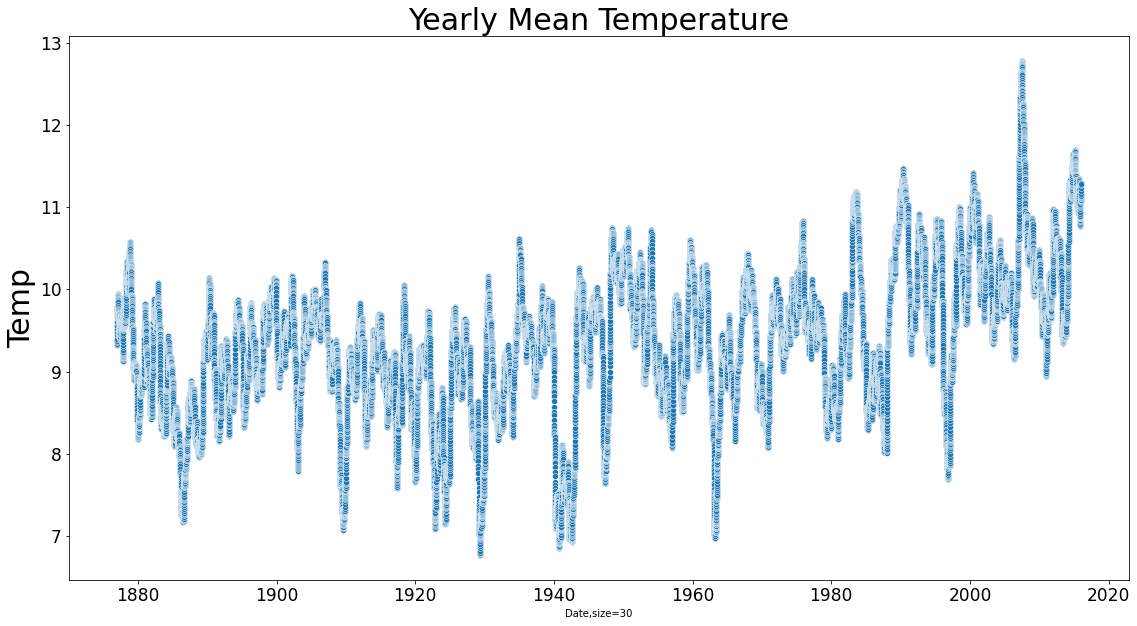

In [113]:
plt.figure(figsize=(19,10))
sns.scatterplot(data =df_train.loc[:'2020-12-31'].rolling(365).mean(), y ='T', x ='DATE')
plt.ylabel('Temp',size=30)
plt.xlabel('Date,size=30')
plt.title('Yearly Mean Temperature',size=30)
plt.xticks(size=17)
plt.yticks(size=17)
plt.show()

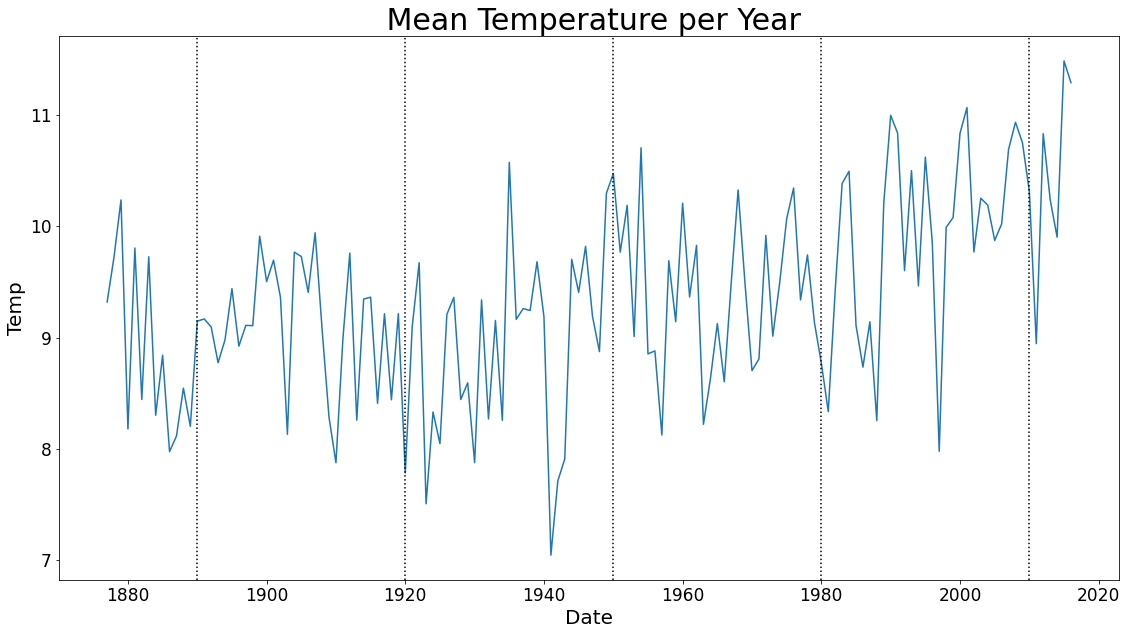

In [114]:
plt.figure(figsize=(19,10))
sns.lineplot(data =df_train.loc[:'2020-12-31'].resample('Y').mean(), y ='T', x ='DATE')
plt.ylabel('Temp',size=20)
plt.xlabel('Date',size=20)
mod = [y for y in df_train.index.year if not y%30]
for year in set(mod):
   plt.axvline(datetime.datetime(year, 1, 1), color='black', ls=':')
plt.title(' Mean Temperature per Year',size=30)
plt.xticks(size=17)
plt.yticks(size=17)
plt.show()

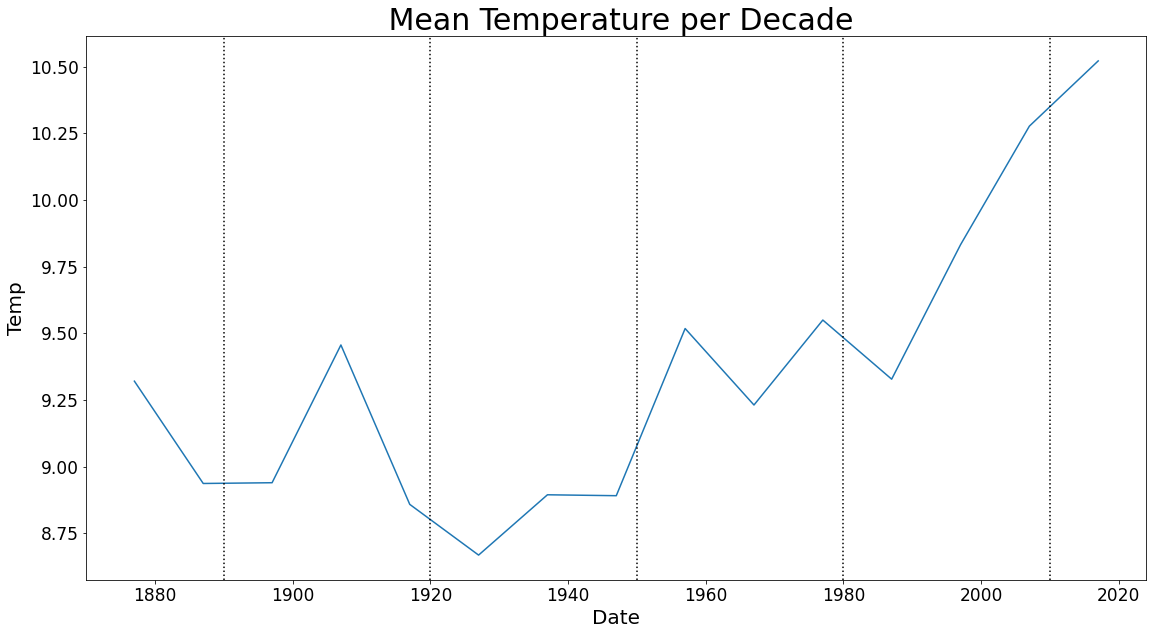

In [115]:
plt.figure(figsize=(19,10))
sns.lineplot(data =df_train.loc[:'2020-12-31'].resample('10Y').mean(), y ='T', x ='DATE')
plt.ylabel('Temp',size=20)
plt.xlabel('Date',size=20)
mod = [y for y in df_train.index.year if not y%30]
for year in set(mod):
   plt.axvline(datetime.datetime(year, 1, 1), color='black', ls=':')
plt.title(' Mean Temperature per Decade',size=30)
plt.xticks(size=17)
plt.yticks(size=17)
plt.show()

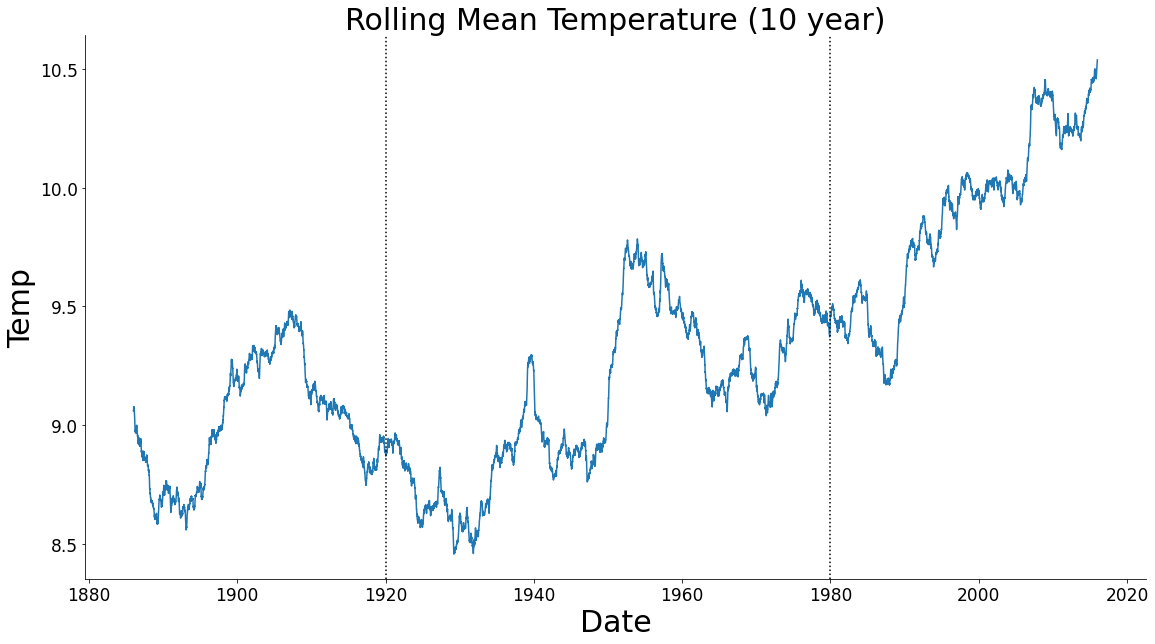

In [116]:
plt.figure(figsize=(19,10))
sns.lineplot(data = df_train.rolling(3652).mean(), y ='T', x ='DATE', markersize=12)
mod = [y for y in df_train.index.year if not y%60]
for year in set(mod):
   plt.axvline(datetime.datetime(year, 1, 1), color='black', ls=':')
plt.ylabel('Temp',size=30)
plt.xlabel('Date',size=30)
plt.title('Rolling Mean Temperature (10 year)',size=30)
plt.xticks(size=17)
plt.yticks(size=17)
sns.despine()

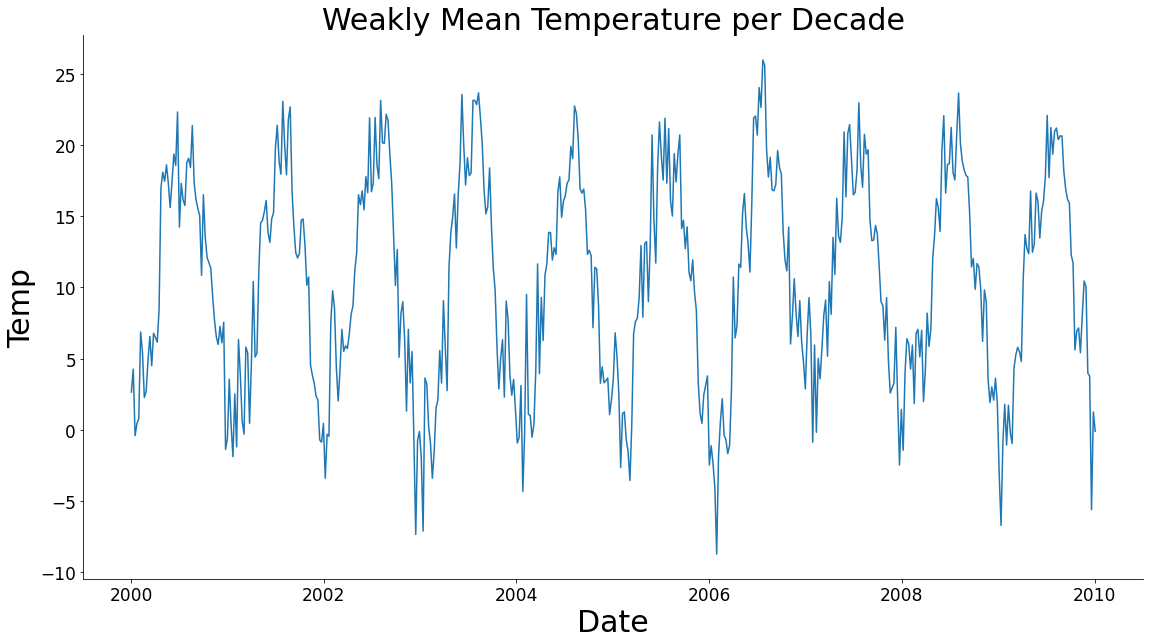

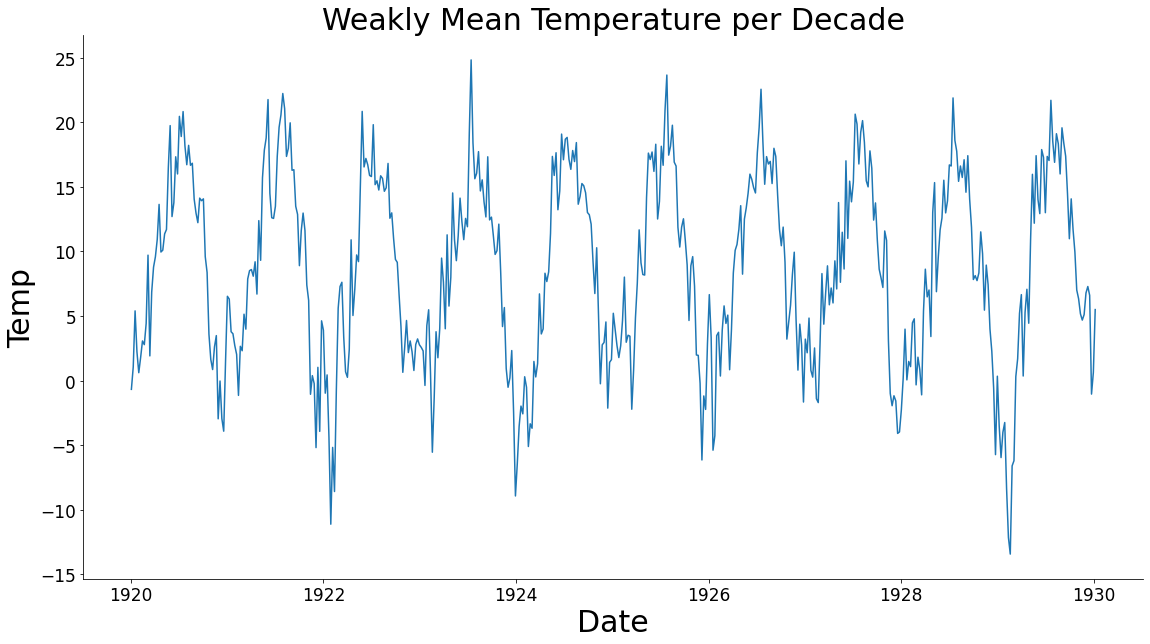

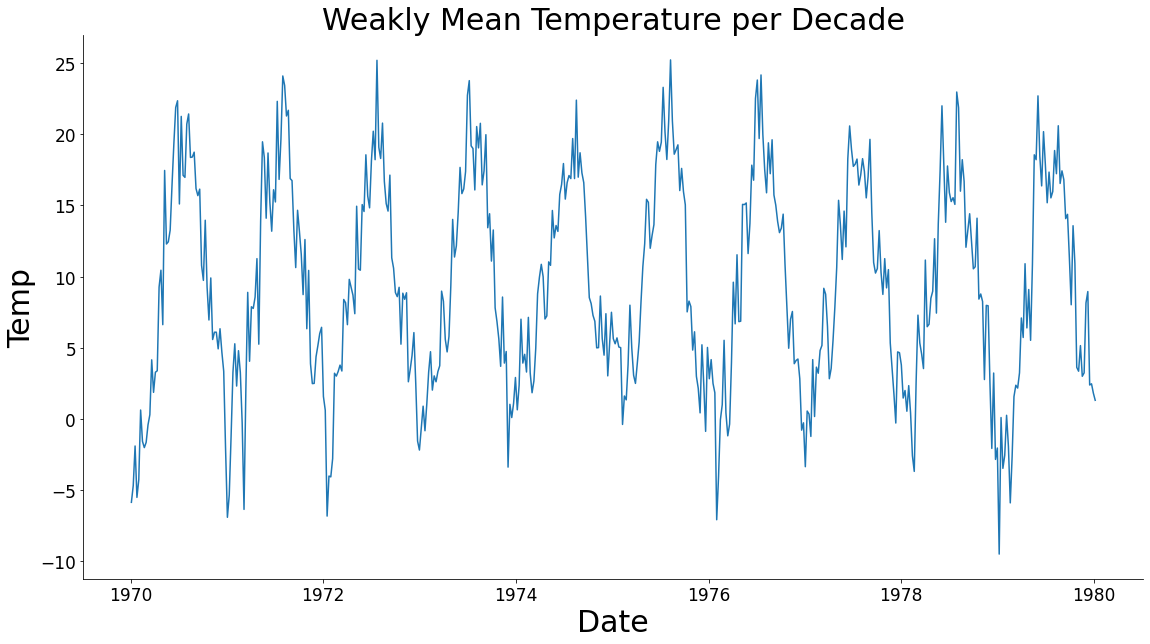

In [117]:
mod = list(set([y for y in df_train.index.year if not y%10]))
for decade in random.sample(mod[:-2],3):
    plt.figure(figsize=(19,10))
    start = f'{decade}-01-01'
    end = f'{decade+9}-12-31'
    sns.lineplot(data = df_train['T'].loc[start:end].resample('W').mean())
    plt.title('Weakly Mean Temperature per Decade',size=30)
    plt.ylabel('Temp',size=30)
    plt.xlabel('Date',size=30)  
    plt.xticks(size=17)
    plt.yticks(size=17)
    sns.despine()

# Cycles of climate? 

### Most important: Yearly Orbit around the Sun

Solar activity: 
  * multiples of 22.75 years
  * intensity increase slowly and then decrease sharply, with a period of about 80-100 years

Ocean-atmosphere interactions: 
 1. El Niño-Southern Oscillation (ENSO): 
  * an interaction between ocean temperatures and atmospheric patterns 
  * 3 to 7 
  * years different weather conditions to different parts of the world (NASA 2009)

2. Pacific Decadal Oscillation (PDO): 
  * occurs in cycles of 25-45 years (Mantua et al. 1997), 

3. Atlantic Multi-decadal Oscillation (AMO):
  * occurring on approximately 65-85 year cycles (Deser et al. 2010). 
  * interaction with the enhanced greenhouse effect (Li et al. 2013).

### Non periodic effects

Orbit around the Sun:
  * changes in eccentricity
  * changes in the tilt of the earth's axis

Random events:
  * Volcanos
  * meteorites
  * comets

Human:
  * Greenhouse gases
  * industrial pollution particles
  * ozone depletion


source:  
 * https://www.fs.usda.gov/ccrc/education/climate-primer/natural-climate-cycles
 * http://dmod.physics.auth.gr/klima_02.htm
 

## Search for higher periodicity than the yearly 

In [118]:
df_train

,T
DATE,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2015-12-27,10.7
2015-12-28,7.2
2015-12-29,4.5


In [119]:
from scipy.interpolate import interp1d

In [120]:
df_train['timestep'] = list(range(len(df_train)))

In [121]:
df_train['timestep^2'] = df_train['timestep']**2
df_train

,T,timestep,timestep^2
DATE,,,
1876-01-01,2.2,0,0
1876-01-02,2.5,1,1
1876-01-03,0.3,2,4
1876-01-04,-5.8,3,9
1876-01-05,-9.8,4,16
...,...,...,...
2015-12-27,10.7,51129,2614174641
2015-12-28,7.2,51130,2614276900
2015-12-29,4.5,51131,2614379161


In [122]:
ramp_start = datetime.datetime(1950,1,1) #The year 1950 was chosen to maximize the score
ramp = [0 for _ in range(len(df_train['timestep'].loc[:ramp_start])-1)]
ext = list(range(len(df_train['timestep'].loc[ramp_start:])))
ramp.extend(ext)
df_train['timestep_ramp'] = ramp

In [123]:
f = df_train.resample('Y').mean()
f

,T,timestep,timestep^2,timestep_ramp
DATE,,,,
1876-12-31,9.320219,182.5,4.446917e+04,0.0
1877-12-31,9.727945,548.0,3.114060e+05,0.0
1878-12-31,10.236712,913.0,8.446710e+05,0.0
1879-12-31,8.180548,1278.0,1.644386e+06,0.0
1880-12-31,9.805191,1643.5,2.712255e+06,0.0
...,...,...,...,...
2011-12-31,10.832055,49490.0,2.449271e+09,22462.0
2012-12-31,10.240437,49855.5,2.485582e+09,22827.5
2013-12-31,9.902740,50221.0,2.522160e+09,23193.0


In [124]:
f1 = interp1d(f['timestep'], f['T'], kind='cubic',fill_value="extrapolate")


In [125]:
f1(df_train['timestep'])

array([11.1217942 , 11.10614477, 11.09056679, ...,  9.05951782,
        9.04155182,  9.02351818])

<AxesSubplot:xlabel='timestep', ylabel='T'>

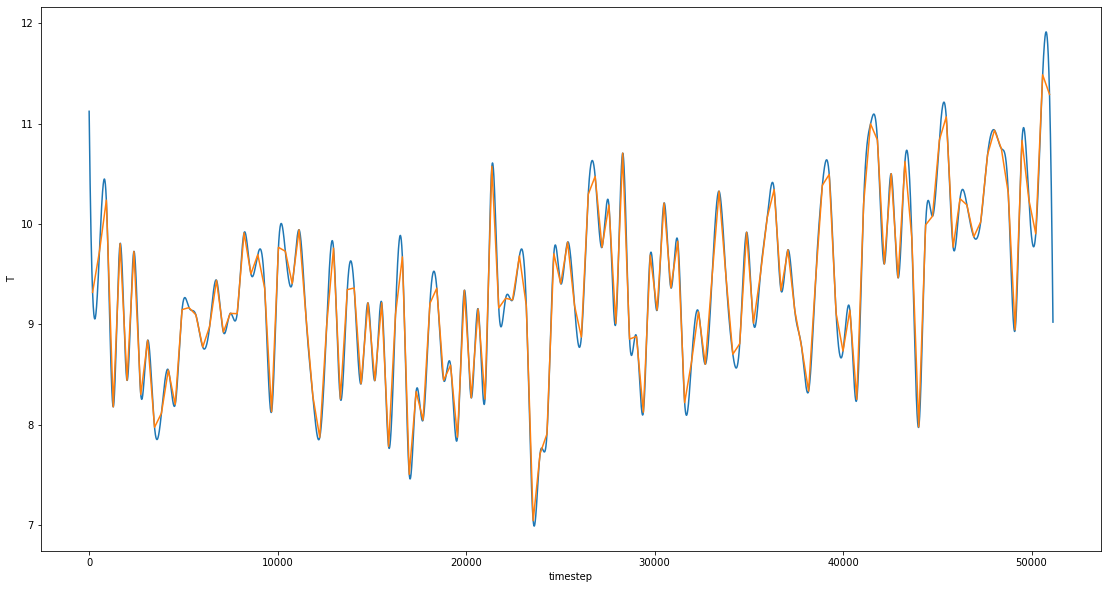

In [126]:
plt.figure(figsize=(19,10))
sns.lineplot(y=f1(df_train['timestep']),x=df_train['timestep'])
sns.lineplot( y =f['T'], x =f['timestep'])


In [127]:
df_train['interpolated'] = f1(df_train['timestep'])

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
df_train

,T,timestep,timestep^2,timestep_ramp,interpolated
DATE,,,,,
1876-01-01,2.2,0,0,0,11.121794
1876-01-02,2.5,1,1,0,11.106145
1876-01-03,0.3,2,4,0,11.090567
1876-01-04,-5.8,3,9,0,11.075060
1876-01-05,-9.8,4,16,0,11.059625
...,...,...,...,...,...
2015-12-27,10.7,51129,2614174641,24101,9.095247
2015-12-28,7.2,51130,2614276900,24102,9.077416
2015-12-29,4.5,51131,2614379161,24103,9.059518


In [130]:
m_trend = LinearRegression()
m_trend.fit(df_train[['timestep','timestep^2','timestep_ramp']], df_train['T'])

LinearRegression()

In [131]:
m_trend.score(df_train[['timestep','timestep^2','timestep_ramp']], df_train['T'])

0.00391809537448129

In [132]:
df_train['trend'] = m_trend.predict(df_train[['timestep','timestep^2','timestep_ramp']])

In [133]:
df_train

,T,timestep,timestep^2,timestep_ramp,interpolated,trend
DATE,,,,,,
1876-01-01,2.2,0,0,0,11.121794,9.326991
1876-01-02,2.5,1,1,0,11.106145,9.326914
1876-01-03,0.3,2,4,0,11.090567,9.326837
1876-01-04,-5.8,3,9,0,11.075060,9.326761
1876-01-05,-9.8,4,16,0,11.059625,9.326684
...,...,...,...,...,...,...
2015-12-27,10.7,51129,2614174641,24101,9.095247,10.719308
2015-12-28,7.2,51130,2614276900,24102,9.077416,10.719434
2015-12-29,4.5,51131,2614379161,24103,9.059518,10.719561


<AxesSubplot:xlabel='DATE', ylabel='interpolated'>

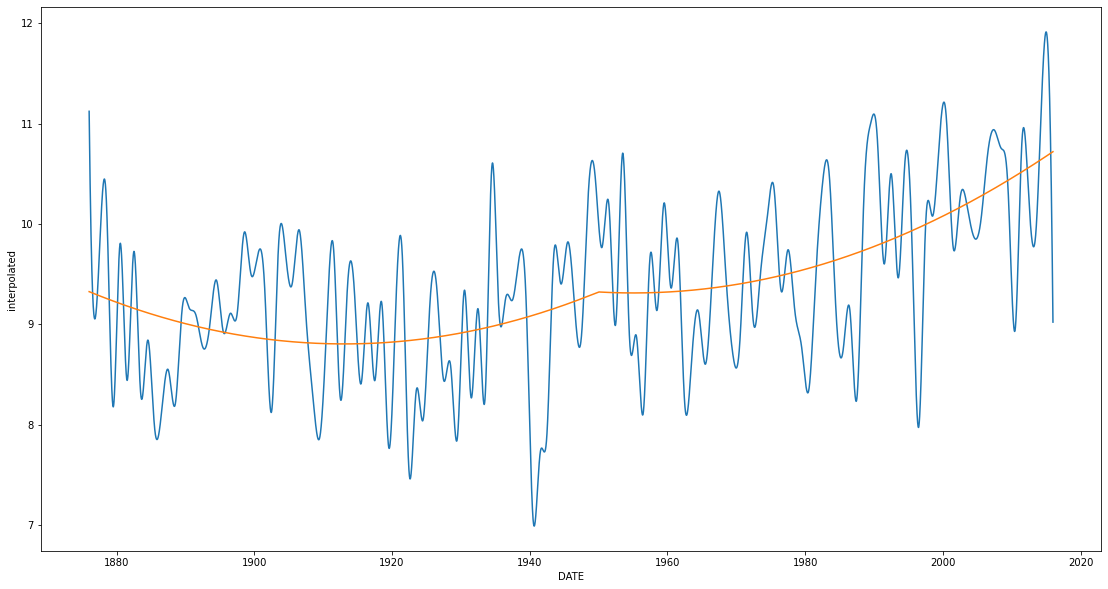

In [134]:
plt.figure(figsize=(19,10))
sns.lineplot(data=df_train, y ='interpolated', x ='DATE')
sns.lineplot(data=df_train, y ='trend', x ='DATE')

In [135]:
signal = df_train['interpolated'] - df_train['trend']
signal

DATE
1876-01-01    1.794803
1876-01-02    1.779231
1876-01-03    1.763729
1876-01-04    1.748300
1876-01-05    1.732941
                ...   
2015-12-27   -1.624061
2015-12-28   -1.642018
2015-12-29   -1.660043
2015-12-30   -1.678135
2015-12-31   -1.696295
Length: 51134, dtype: float64

In [136]:
# Number of sampling points
n = len(signal)
n

51134

<AxesSubplot:xlabel='timestep'>

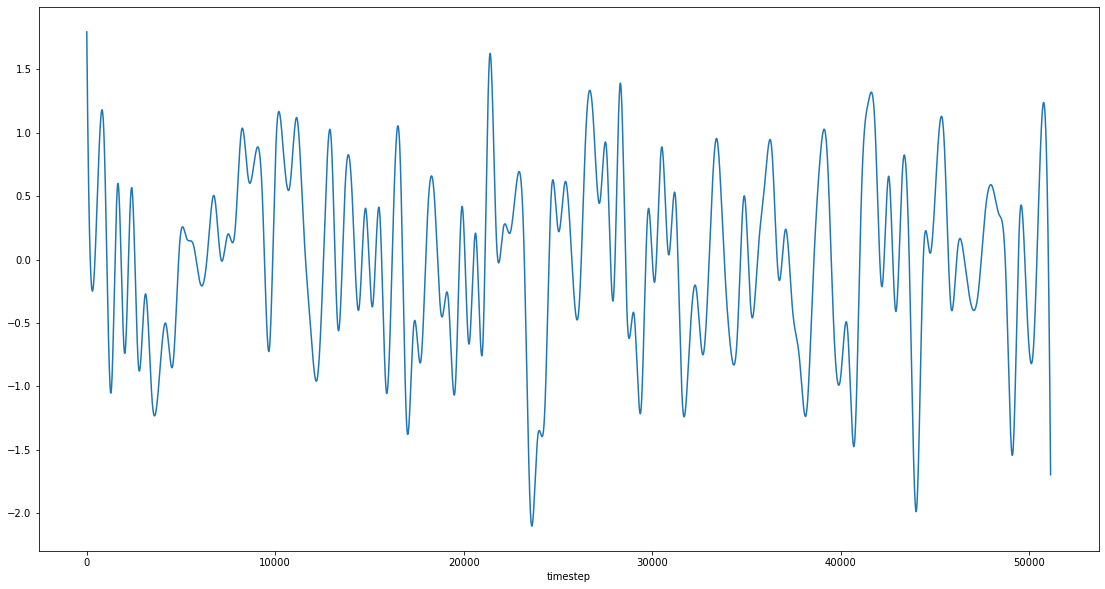

In [137]:
plt.figure(figsize=(19,10))
sns.lineplot(y=signal,x=df_train['timestep'])

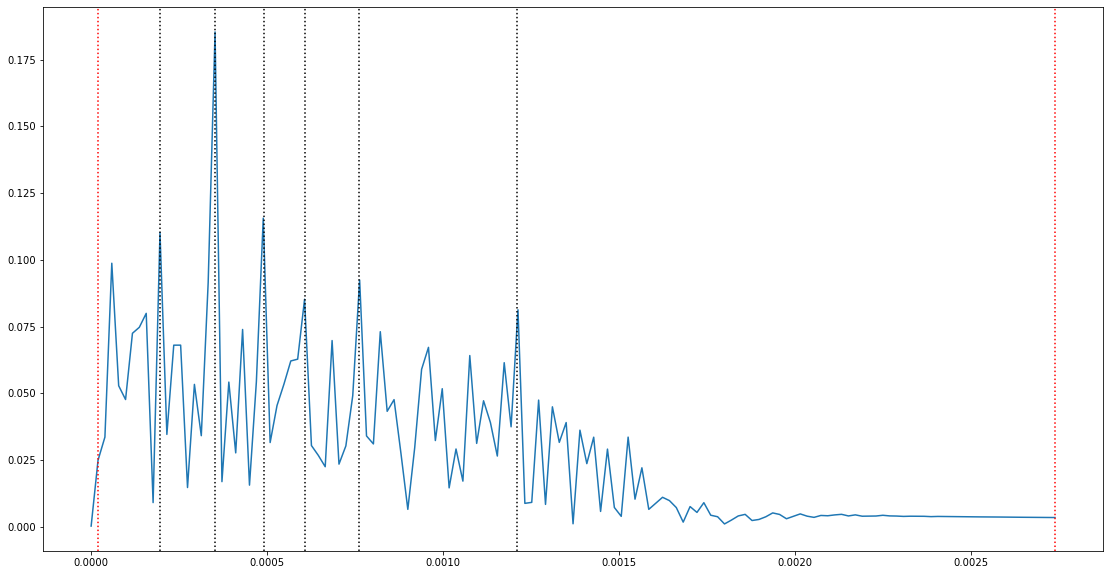

In [138]:

# Sampling space
T = 1.0/365.25 

# fast fourier transform
fourier_signal = np.fft.fft(signal,n)/n
fourier_signal = fourier_signal[range(int(n/2))]

freq = np.arange(int(n/2))/n
plt.figure(figsize=(19,10))

sns.lineplot(x=freq[:141], y=np.abs(fourier_signal)[:141])
plt.axvline(1.955607705094358e-05, color='red', ls=':') # f = 1/1year
plt.axvline(0.0027378507871321013, color='red', ls=':') # f = 1/140year
plt.axvline(0.000197, color='black', ls=':') # peak 0
#plt.axvline(0.000239, color='black', ls=':') # peak 1
plt.axvline(0.000351, color='black', ls=':') # peak 2
#plt.axvline(0.000432, color='black', ls=':') # peak 3
plt.axvline(0.000491, color='black', ls=':') # peak 4
plt.axvline(0.000607, color='black', ls=':') # peak 5
#plt.axvline(0.000683, color='black', ls=':') # peak 6
plt.axvline(0.000762, color='black', ls=':') # peak 7
#plt.axvline(0.000824, color='black', ls=':') # peak 8
#plt.axvline(0.000959, color='black', ls=':') # peak 9
#plt.axvline(0.001075, color='black', ls=':') # peak 10
plt.axvline(0.001211, color='black', ls=':') # peak 11
plt.show
None

In [139]:
frequencies = [0.000197,0.000351,0.000491,0.000607,0.000762,0.001211] #Taking into account only the highest peaks

In [140]:
# for a period of 1 year the frequency is 1/(365.25)
# We have taken the yearly mean so we can only consider 
# smaller than this frequencies
1.0/365.25

0.0027378507871321013

In [141]:
# for a period of 140 year the frequency is 1/(140*365.25)
# We cannot consider larger than this frequencies
1.0/(140.0*365.25)
# for this reason we cannot consider the first peak

1.955607705094358e-05

In [142]:
for i,frequency in enumerate(frequencies):
    T = 1.0/frequency
    T_year = T/365.25
    print(f'Period {i}: {T_year} years')

Period 0: 13.897719731635032 years
Period 1: 7.800144692684049 years
Period 2: 5.576070849556214 years
Period 3: 4.510462581766229 years
Period 4: 3.592980035606432 years
Period 5: 2.2608181561784484 years


In [143]:
#for i,frequency in enumerate(frequencies):
#    df_train[f'freq_{i}_sinus'] = np.sin(2.0*np.pi*frequency*df_train['timestep'])
#    df_train[f'freq_{i}_cos'] = np.cos(2.0*np.pi*frequency*df_train['timestep'])

In [144]:
df_train

,T,timestep,timestep^2,timestep_ramp,interpolated,trend
DATE,,,,,,
1876-01-01,2.2,0,0,0,11.121794,9.326991
1876-01-02,2.5,1,1,0,11.106145,9.326914
1876-01-03,0.3,2,4,0,11.090567,9.326837
1876-01-04,-5.8,3,9,0,11.075060,9.326761
1876-01-05,-9.8,4,16,0,11.059625,9.326684
...,...,...,...,...,...,...
2015-12-27,10.7,51129,2614174641,24101,9.095247,10.719308
2015-12-28,7.2,51130,2614276900,24102,9.077416,10.719434
2015-12-29,4.5,51131,2614379161,24103,9.059518,10.719561


In [145]:
#plt.figure(figsize=(19,10))
#sns.lineplot(data=df_train, y ='freq_0_sinus', x ='DATE')

In [146]:
#m_seasonal_trend = LinearRegression()
#m_seasonal_trend.fit(df_train.drop(columns=['T','interpolated', 'trend']), df_train['T'])

In [147]:
#m_seasonal_trend.score(df_train.drop(columns=['T','interpolated', 'trend']), df_train['T'])

In [148]:
#df_train['seasonal_trend'] = m_seasonal_trend.predict(df_train.drop(columns=['T','interpolated', 'trend']))

In [149]:
#plt.figure(figsize=(19,10))
#sns.lineplot(data=df_train, y ='interpolated', x ='DATE')
#sns.lineplot(data=df_train, y ='seasonal_trend', x ='DATE')

Another way to include seasonality is by creating bins.

In [150]:
df_train['cycle_2'] = df_train.index.year% 14 # peak 0 (T = 13.9)
df_train['cycle_1'] = df_train.index.month # Yearly cycle
df_train['cycle_3'] = df_train.index.month% 94 # 7.800x12 ~93.6
df_train['cycle_4'] = df_train.index.month% 67 # 5.576x12 ~66.9
df_train['cycle_5'] = df_train.index.month% 43  #3.593x12
df_train.columns

Index(['T', 'timestep', 'timestep^2', 'timestep_ramp', 'interpolated', 'trend',
       'cycle_2', 'cycle_1', 'cycle_3', 'cycle_4', 'cycle_5'],
      dtype='object')

In [151]:
df_train = pd.get_dummies(df_train, columns=['cycle_1', 'cycle_2', 'cycle_3', 'cycle_4', 'cycle_5'], drop_first=True, )

In [152]:
df_train

,T,timestep,timestep^2,timestep_ramp,interpolated,trend,cycle_1_2,cycle_1_3,cycle_1_4,cycle_1_5,...,cycle_5_3,cycle_5_4,cycle_5_5,cycle_5_6,cycle_5_7,cycle_5_8,cycle_5_9,cycle_5_10,cycle_5_11,cycle_5_12
DATE,,,,,,,,,,,,,,,,,,,,,
1876-01-01,2.2,0,0,0,11.121794,9.326991,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-02,2.5,1,1,0,11.106145,9.326914,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-03,0.3,2,4,0,11.090567,9.326837,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-04,-5.8,3,9,0,11.075060,9.326761,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1876-01-05,-9.8,4,16,0,11.059625,9.326684,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,10.7,51129,2614174641,24101,9.095247,10.719308,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2015-12-28,7.2,51130,2614276900,24102,9.077416,10.719434,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2015-12-29,4.5,51131,2614379161,24103,9.059518,10.719561,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [153]:
m_seasonal_trend = LinearRegression()
m_seasonal_trend.fit(df_train.drop(columns=['T','interpolated', 'trend']), df_train['T'])

LinearRegression()

In [154]:
m_seasonal_trend.score(df_train.drop(columns=['T','interpolated', 'trend']), df_train['T'])

0.7529772447582461

In [155]:
df_train['seasonal_trend'] = m_seasonal_trend.predict(df_train.drop(columns=['T','interpolated', 'trend']))

<AxesSubplot:xlabel='DATE', ylabel='T'>

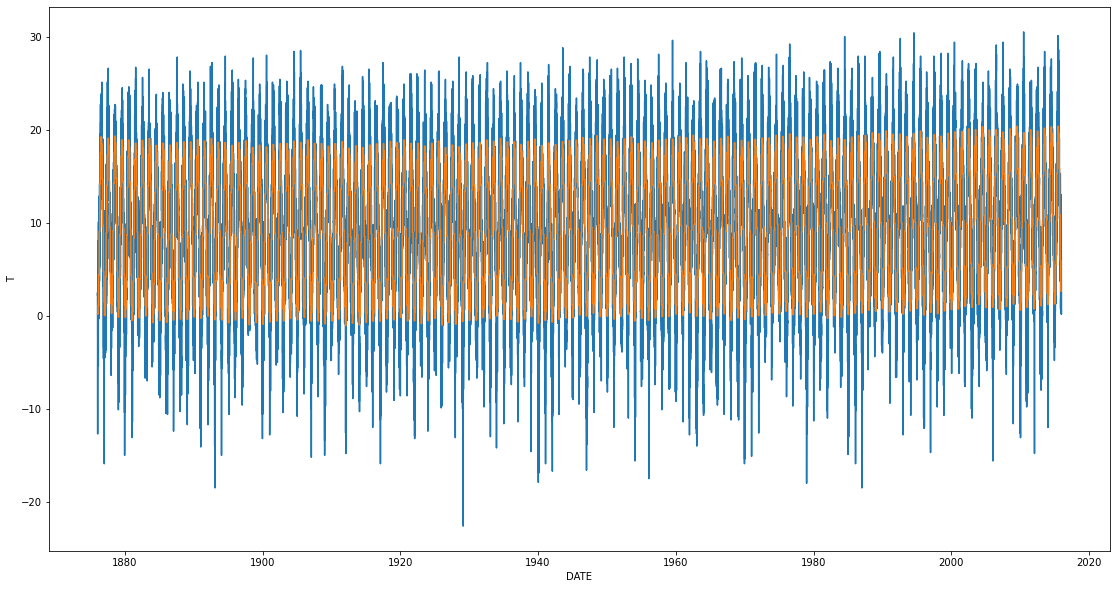

In [156]:
plt.figure(figsize=(19,10)) #Fix this
sns.lineplot(data=df_train, y ='T', x ='DATE')
sns.lineplot(data=df_train, y ='seasonal_trend', x ='DATE')

In [157]:
df_train['remainder'] = df_train['T'] - df_train['seasonal_trend']

In [162]:
df_train['T'].describe()

count    51134.000000
mean         9.341266
std          7.875370
min        -22.600000
25%          3.300000
50%          9.400000
75%         15.700000
max         30.500000
Name: T, dtype: float64

In [163]:
df_train['remainder'].describe()

count    5.113400e+04
mean    -1.661318e-15
std      3.914168e+00
min     -2.292679e+01
25%     -2.589690e+00
50%     -8.126779e-04
75%      2.671437e+00
max      1.540170e+01
Name: remainder, dtype: float64

<AxesSubplot:xlabel='T', ylabel='Count'>

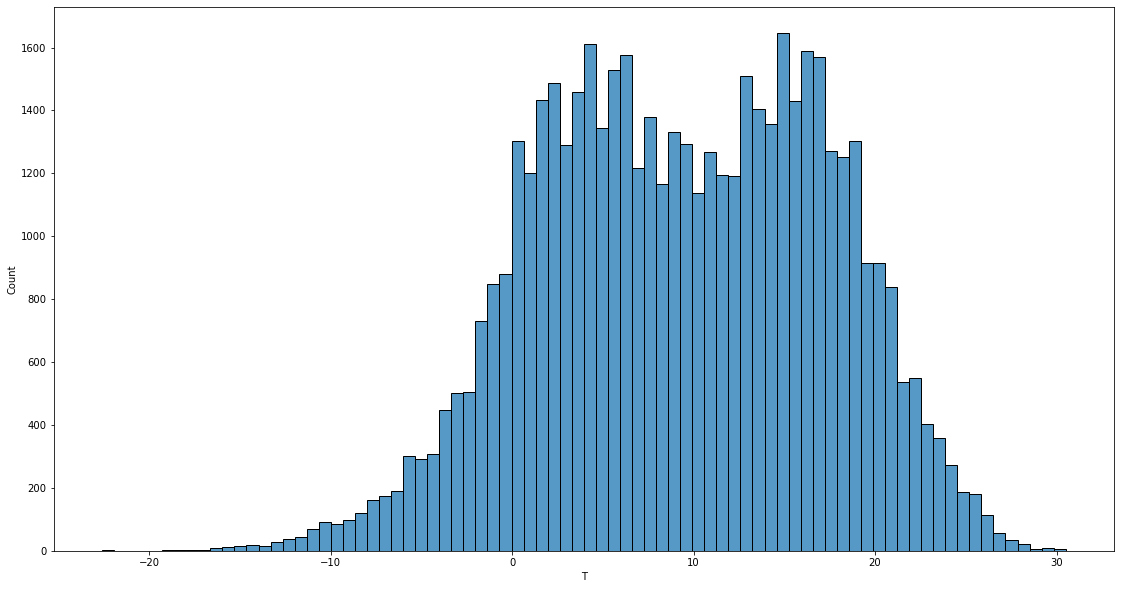

In [159]:
plt.figure(figsize=(19,10))
sns.histplot(data=df_train, x ='T')

<AxesSubplot:xlabel='remainder', ylabel='Count'>

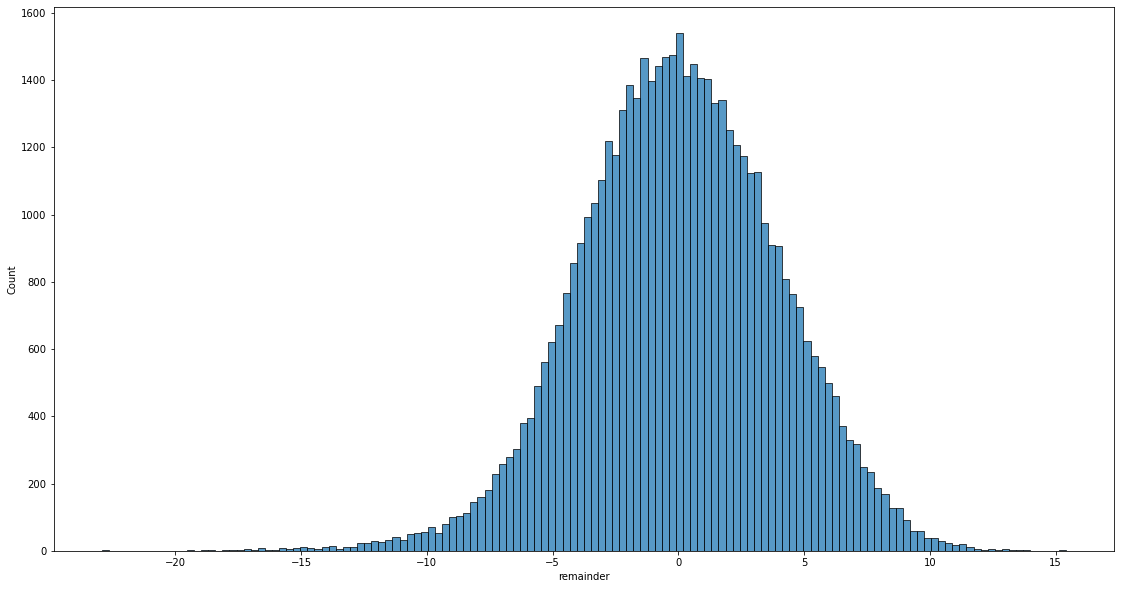

In [160]:
plt.figure(figsize=(19,10))
sns.histplot(data=df_train, x ='remainder')

<AxesSubplot:xlabel='DATE', ylabel='remainder'>

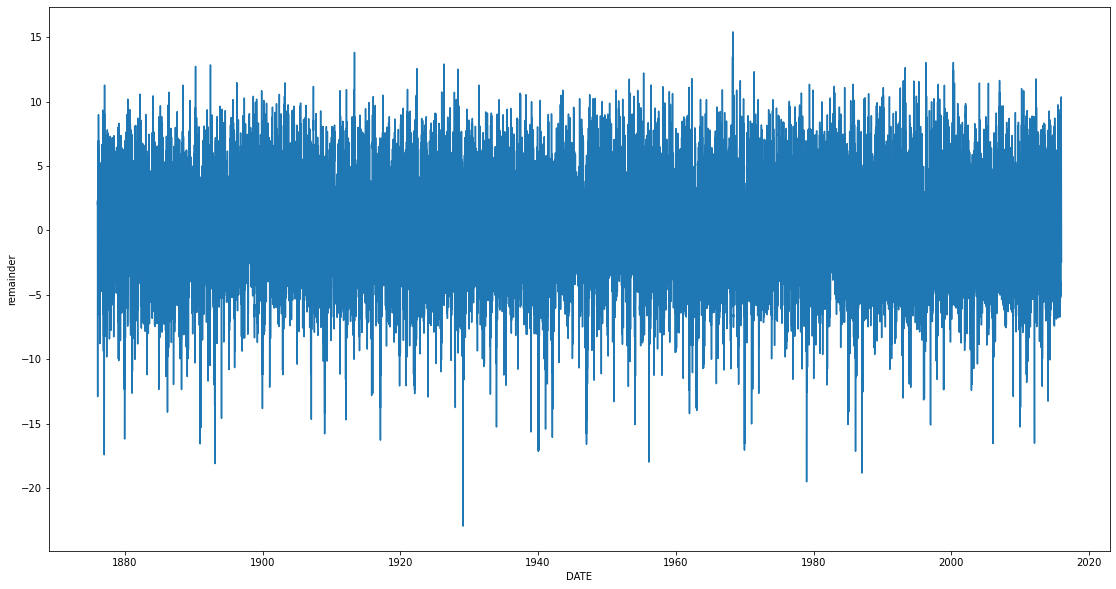

In [161]:
plt.figure(figsize=(19,10))
sns.lineplot(data=df_train, y ='remainder', x ='DATE')

In [ ]:
# TODO Model validation with test data